In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Armado de Dfs con columnas que me tocaron
df_original = pd.read_csv("./dataset/hotels_train.csv")
df = df_original.copy()

#Elimino variables que no me tocan analizar
columns_to_eliminate = (df.columns)[:21]
df.drop(columns = columns_to_eliminate, inplace = True)

#Elimino la variable reservation_status_date evitar confusiones o data leakage como indicaron desde la catedra
df.drop(columns=['reservation_status_date'], inplace = True)

#Elimino ID ya que no aporta valor al analisis al ser una variable ofuscada para mantener la privacidad
df.drop(columns = ['id'], inplace = True)

df_canceled = df[df.is_canceled == 1]
df_not_canceled = df[df.is_canceled == 0]

In [3]:
variables_cualitativas = ['deposit_type','agent','company','customer_type','is_canceled']

variables_cuantitativas = list(set(df.columns) - set(variables_cualitativas))

## Exploración inicial
### Variables

1. **deposit_type:** Esta variable cualitativa es de tipo alfanumérica y contendrá informacion sobre el tipo de reserva.
      Los posibles valores son:
    - *No Deposit:* No se realizo deposito. Aparece en 51685 (83.5%) de los registros.
    - *Non Refund:* Se realizo deposito por un valor igual o superior al valor de la reserva. Aparece en 10150 (16.4%) de los registros.
    - *Refundable:* Se realizo deposito por un valor menos al valor de la reserva. Aparece en 78 (0.13%) de los registros.

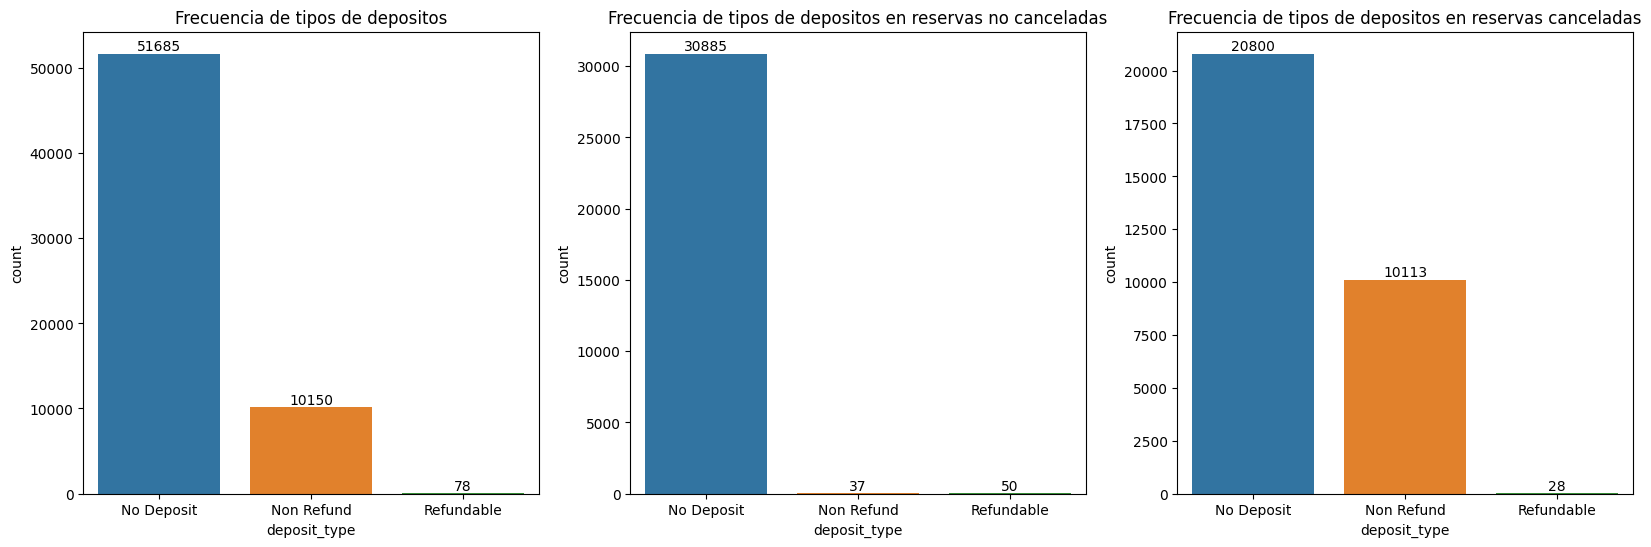

In [4]:
ig, ax = plt.subplots(1, 3, figsize = (20, 6))

sns00 = sns.countplot(data = df, x = "deposit_type", ax = ax[0])
for label in sns00.containers:
    sns00.bar_label(label)

sns01 = sns.countplot(data = df_not_canceled, x = "deposit_type", ax = ax[1])
for label in sns01.containers:
    sns01.bar_label(label)
    
sns02 = sns.countplot(data = df_canceled, x = "deposit_type", ax = ax[2])
for label in sns02.containers:
    sns02.bar_label(label)

ax[0].set_title('Frecuencia de tipos de depositos')
ax[1].set_title('Frecuencia de tipos de depositos en reservas no canceladas')
ax[2].set_title('Frecuencia de tipos de depositos en reservas canceladas')


plt.show()

En principio nos resulto llamativo que aproximadamente el 30% de las reservas canceladas fueron abonadas en su totalidad mientras que las reservas que no fueron canceladas tienen un porcentaje menor al 1% de reservas abonadas. 
Por otro lado tambien es esperable que sean canceladas en mayor medida aquellas reservas que fueron abonadas en su totalidad ya que se podria recuperar algo o parte de su valor mientras que en el caso de las reservas no abonadas, al no estar perdiendo un deposito, el cliente podria no estar interesado en cancelar la reserva y simplemente no ir al hotel.
***

2. **agent:** Esta variable cualitativa es de tipo numerica y contendra informacion sobre el ID del agente de viajes (en caso 
    de que se uso uno) con el cual se realizo la reserva, sino fue utlizado un agente se describe esto mediante NULL.
    Los agentes mas utlizados son:
    - *9.0:* Aparece en 17004 (27.5%) de los registros.
    - *240:* Aparece en 7386 (12%) de los registros.
    - *1.0:* Aparece en 4424 (7.15%) de los registros.

En total son 297 posibles valores los que toma esta variable incluyendo a NULL.
***

3. **company:** Esta variable cualitativa es de tipo numerica y contendra informacion sobre el ID de la compañia (en caso 
    de que haya sido una) la cual realizo/ abono la reserva, si no fue realiada pur una compañia se describe esto mediante NULL.
    Las compañias que mas reservas realizaron son:
    - *40.0:* Aparece en 390 (0.63%) de los registros.
    - *223.0:* Aparece en 364 (0.59%) de los registros.
    - *67.0:* Aparece en 169 (0.27%) de los registros.

En total son 277 posibles valores los que toma esta variable incluyendo a NULL.
***

4. **days_in_waiting_list:** Esta variable cuantitativa de tipo numerica contendra informacion sobre los dias que estuvo en
    espera la reserva del cliente hasta que fue confirmada por parte del hotel. Sus analisis inicial:
    - *Moda:* 0.
    - *Media:* 2.6.
    - *Mediana:* 0.

Esta variable es 0 en 59678 casos (96%)
***

5. **customer_type:** Esta variable cualitativa es de tipo alfanumerica y contendra informacion sobre el tipo de reserva realizada
    contemplando 4 posibles categorias:
    - *Contract:* Indica que la reserva esta asociada a un paquete turistico. Aparece en 2033 (3.3%) de los registros.
    - *Group:* Indica que la reserva esta asociada a un grupo. Aparece en 263 (0.4%) de los registros.
    - *Transient:* Indica que no esta asociada a un paquete, un grupo u otra reserva. 
      Aparece en 47449 (76.6%) de los registros.
    - *Transient-party:* Indica que la reserva no esta asociada a un paquete o grupo, pero si a otra reserva transient. 
      Aparece en 12168 (19.7%) de los registros.

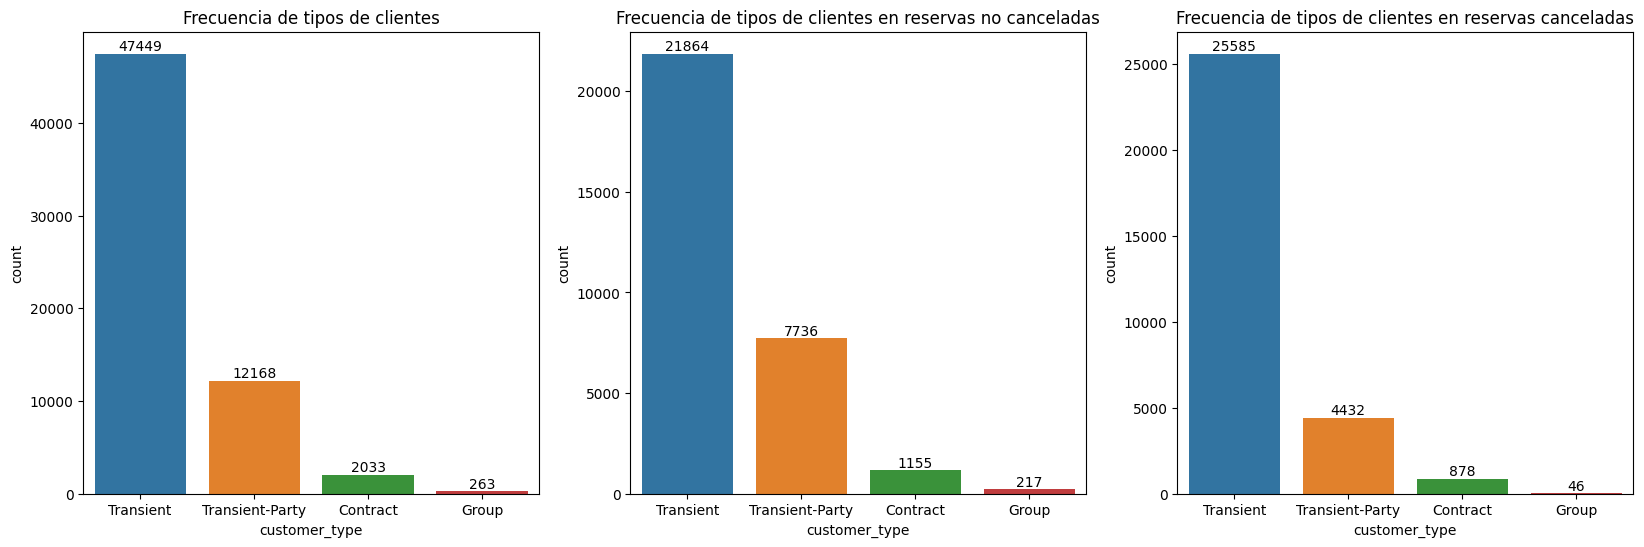

In [5]:
ig, ax = plt.subplots(1, 3, figsize = (20, 6))

sns00 = sns.countplot(data = df, x = "customer_type",ax= ax[0])
for label in sns00.containers:
    sns00.bar_label(label)

sns01 = sns.countplot(data = df_not_canceled, x = "customer_type",ax= ax[1])
for label in sns01.containers:
    sns01.bar_label(label)
    
sns02 = sns.countplot(data = df_canceled, x = "customer_type",ax= ax[2])
for label in sns02.containers:
    sns02.bar_label(label)

ax[0].set_title('Frecuencia de tipos de clientes')
ax[1].set_title('Frecuencia de tipos de clientes en reservas no canceladas')
ax[2].set_title('Frecuencia de tipos de clientes en reservas canceladas')

plt.show()

***

6. **adr:** Esta variable cuantitativa de tipo numerica indica el valor promedio del dia de hospedaje calculado como el 
     importe total dividido por la cantidad de dias.  
    - *Moda:* 62.0.
    - *Media:* 102.3.
    - *Mediana:* 95.0.

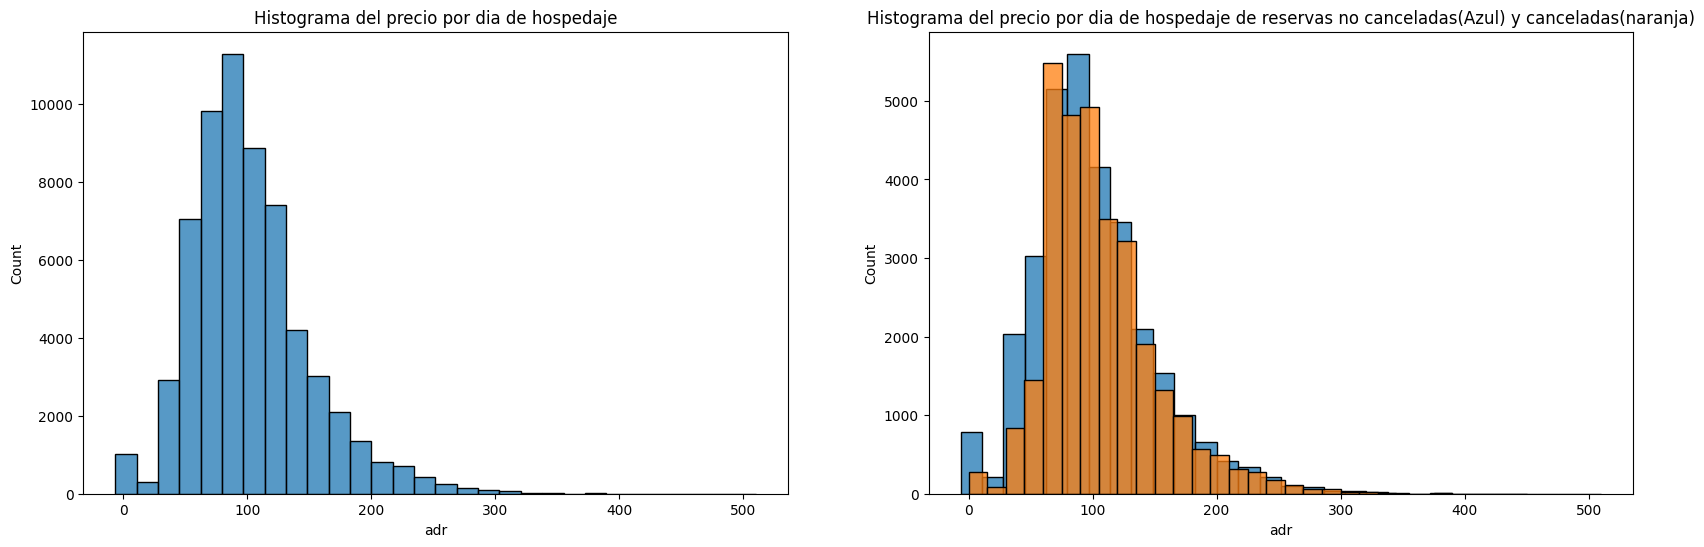

In [6]:
ig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.histplot(df, x = 'adr', ax = ax[0], bins = 30)
sns.histplot(df_not_canceled, x = 'adr', ax = ax[1], bins = 30)
sns.histplot(df_canceled, x = 'adr', ax = ax[1], bins = 30)

ax[0].set_title('Histograma del precio por dia de hospedaje')
ax[1].set_title('Histograma del precio por dia de hospedaje de reservas no canceladas(Azul) y canceladas(naranja)')

plt.show()

Notamos que aquellas reservas que fueron canceladas tienden a tener menores precios por dias de hospedaje que aquellas que no fueronn canceladas.Existen posibles valores atipicos, donde las reservas tienen 0 como precio promedio y valores donde el precio promedio es negativo.
***

7. **required_car_parking_spaces:** Esta variable cuantitativa indica la cantidad de espacios para autos reservados por el cliente 
    - *Moda:* 0.
    - *Media:* 0.05.
    - *Mediana:* 0.

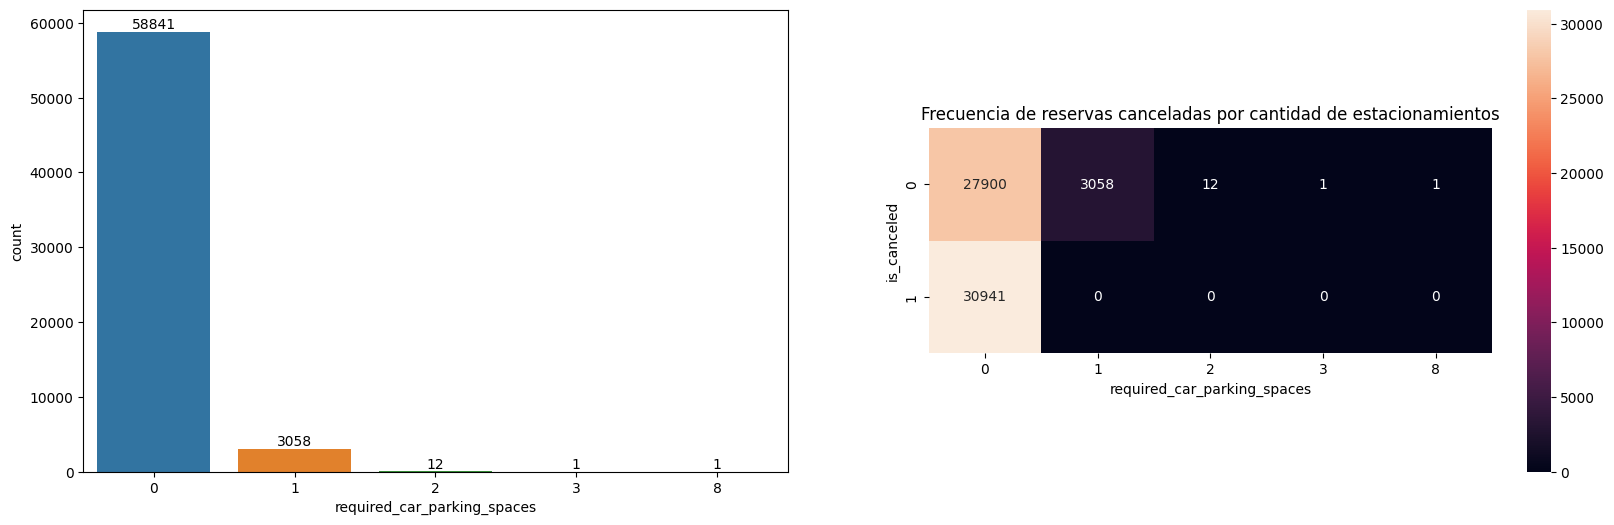

In [7]:
ig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns00 = sns.countplot(data = df, x = 'required_car_parking_spaces', ax = ax[0])
for label in sns00.containers:
    sns00.bar_label(label)

tabla_estacionamientos = pd.crosstab(df['is_canceled'], df['required_car_parking_spaces'])
ax[1].set_title('Frecuencia de reservas canceladas por cantidad de estacionamientos')

sns.heatmap(tabla_estacionamientos, annot = True, square = True, ax = ax[1], fmt='g')

plt.show()

Notamos que ninguna de las reservas que fueron canceladas reservaron un lugar de estacionamiento.
***

8. **total_of_special_requests:** Esta variable de tipo cuantitativa indica la cantidad de pedidos adicionales realizados por el 
     cliente
    - *Moda:* 0.
    - *Media:* 0.5.
    - *Mediana:* 0.

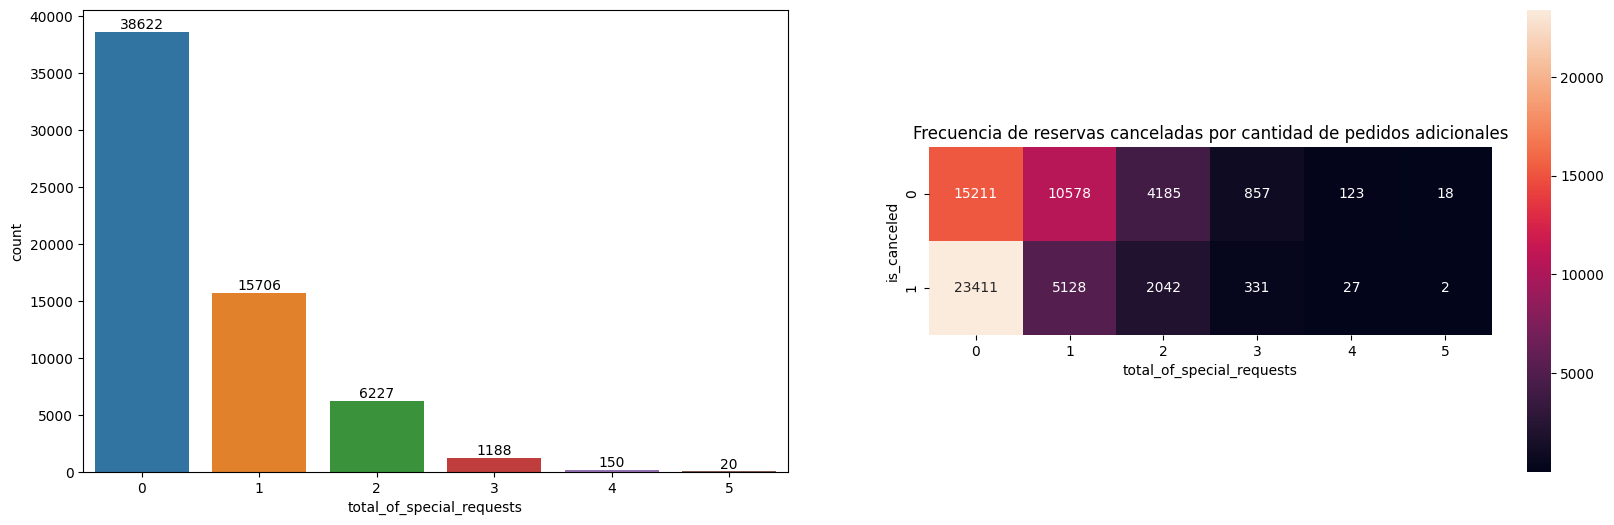

In [8]:
ig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns00 = sns.countplot(data = df, x = 'total_of_special_requests', ax = ax[0])
for label in sns00.containers:
    sns00.bar_label(label)

tabla_adicionales = pd.crosstab(df['is_canceled'], df['total_of_special_requests'])
ax[1].set_title('Frecuencia de reservas canceladas por cantidad de pedidos adicionales')

sns.heatmap(tabla_adicionales, annot = True, square = True, ax = ax[1], fmt='g')

plt.show()

Notames que las reservas con menor cantidad de pedidos especiales tienden a ser canceladas en mayor proporcion.
***

9. **is_canceled:** Esta variable binaria indica si la reserva fue cancelada (1) o no (0).
    - *0:* No cancelada. Aparece en 30972 (50%) de los registros.
    - *1:* Cancelada. Aparece en 30941 (50%) de los registros.

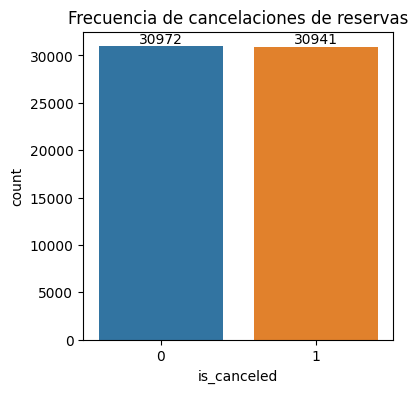

In [9]:
ig, ax = plt.subplots(1, 1, figsize = (4, 4))

a = sns.countplot(data = df, x = "is_canceled", ax = ax)
for label in a.containers:
    a.bar_label(label)

ax.set_title('Frecuencia de cancelaciones de reservas')

plt.show()

Notamos que es estan canceladas aproximadamente el 50% de las reservas.